In [ ]:
import torch
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = SamProcessor.from_pretrained("wanglab/medsam-vit-base")
model = SamModel.from_pretrained("wanglab/medsam-vit-base").to(device)

In [ ]:
import os
import cv2
import torch
import base64
import nibabel as nib
import glob
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
model.to(device)

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
     

In [ ]:
image = cv2.imread("rarareerah.jpg")

In [ ]:
image = cv2.resize(image,(256,256))

In [ ]:
image.shape

(256, 256, 3)

(-0.5, 255.5, 255.5, -0.5)

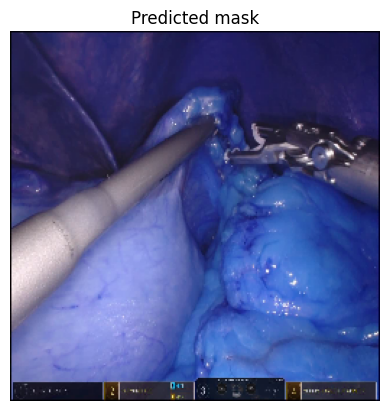

In [ ]:
def show_mask(mask, ax, random_color=False): # this is what we need
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

fig, axes = plt.subplots()

axes.imshow(np.array(image))
#show_mask(medsam_seg, axes)
axes.title.set_text(f"Predicted mask")
axes.axis("off")

In [ ]:
import os

1. Create image file (100 images)
2. iterate through, resize, ect.
3. show mask for each image

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


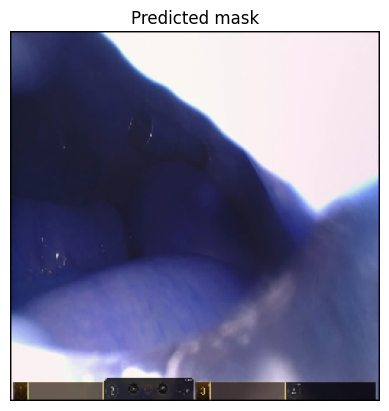

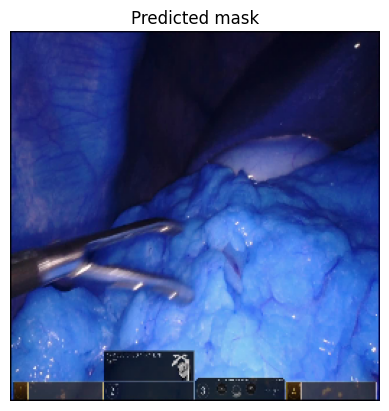

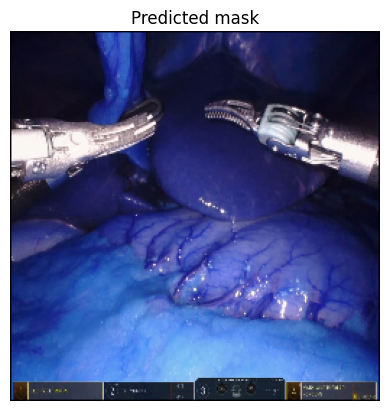

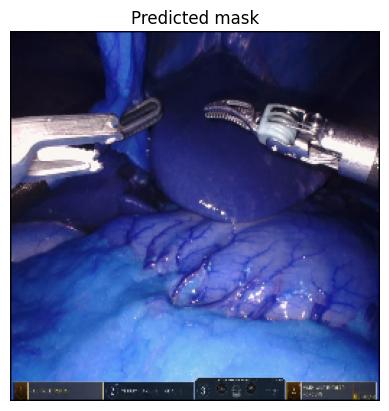

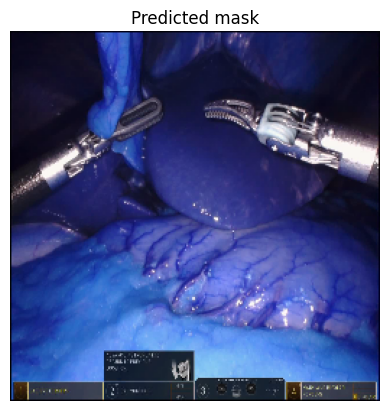

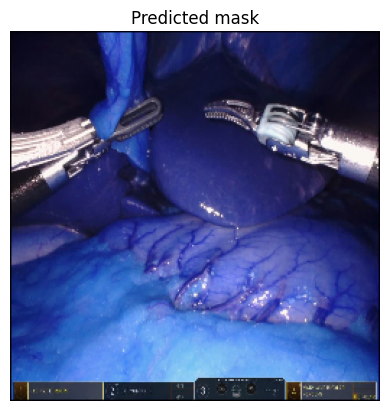

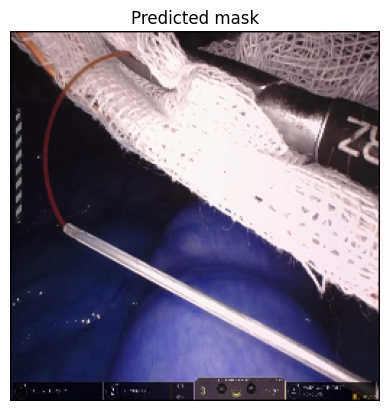

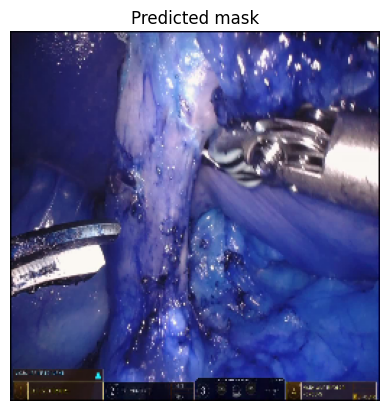

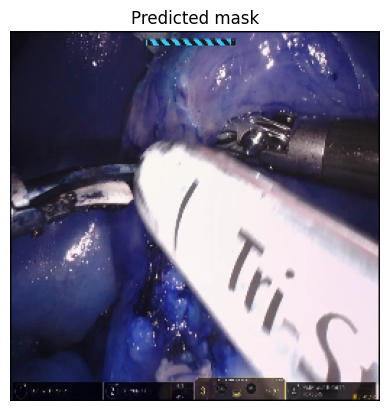

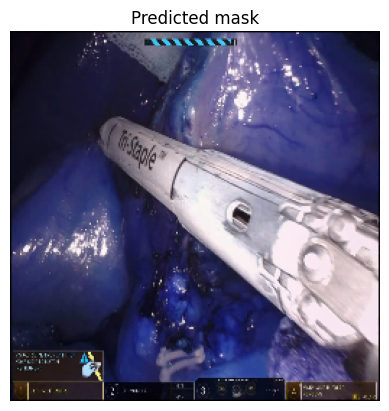

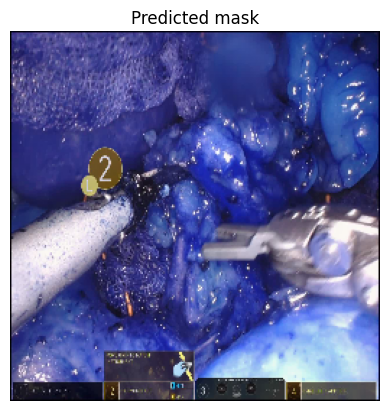

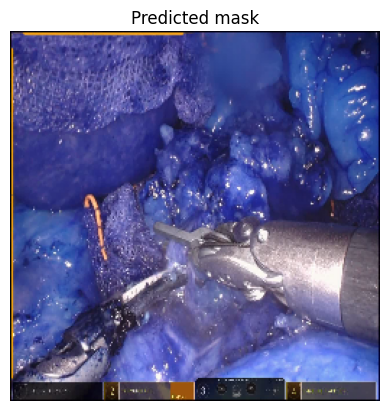

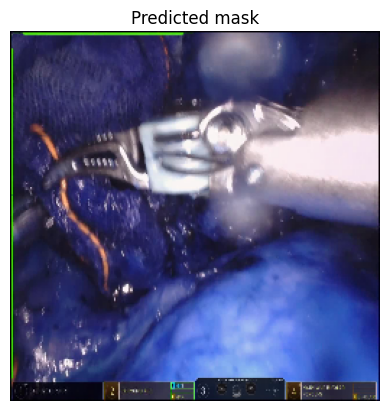

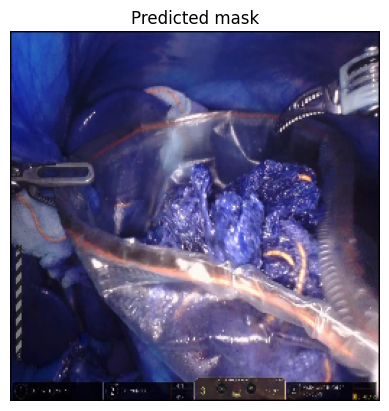

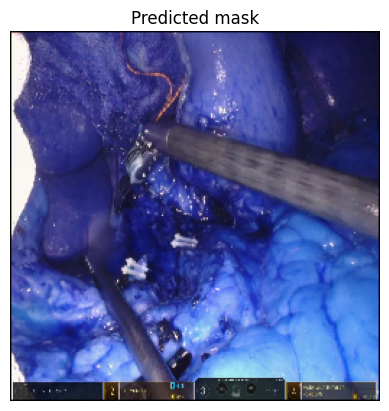

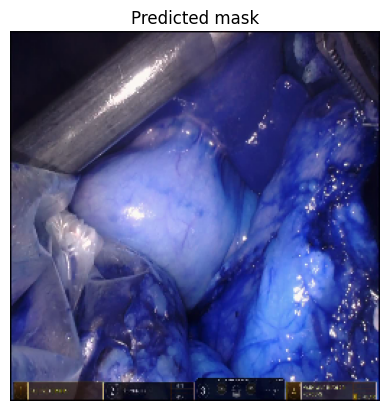

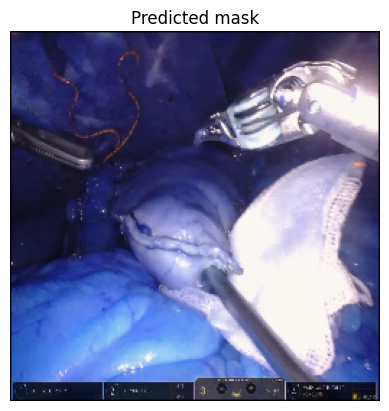

In [ ]:
for file in os.walk('/content/drive/MyDrive/Surgical Scenes'):
  print(file[2])
  for image in file[2]:
    image = cv2.imread(image)
    image = cv2.resize(image,(256,256))
    fig, axes = plt.subplots()

    axes.imshow(np.array(image))
    #show_mask(medsam_seg, axes)
    axes.title.set_text(f"Predicted mask")
    axes.axis("off")